# An Attempt at Detecting knowldege inconsistencies in smaller models with limited compute
## Using the scripts provided at https://github.com/fanqiwan/KCA
Based on Wan et al., 2024, "Knowledge verification to nip hallucination in the bud". Excluding fine-tuning of models, thus limited to investigation of knowledge inconsistencies between alignment data and foundation models and estimation of hallucination rates.

## Outline (following Wan et al.)

### Knowledge Requirements Classification
Use a well-aligned LLM to analyse the knowledge requirements of the questions from the datasets. Skipped here in favour of better quality from files included in KCA.

### Reference Knowledge Generation
Use a well-aligned LLM to generate the reference knowledge required to answer the questions provided. Skipped here in favour of better quality from files included in KCA.

### Examination Formulation
Use a well-aligned LLM to generate multiple-choice questions testing for the previously generated reference knowledge required to answer the questions from the datasets. Skipped here in favour of better quality from files included in KCA.

### Examination Completion
Have a (smaller) LLM answer the previously generated multiple-choice questions to detect knowledge inconsistencies between this LLM and the datasets. Done for two new models: Tiny-LLM and Qwen2-1.5B.

### Data Construction
Construct fine-tuning datasets from the source datasets adjusted for knowledge inconsistencies (tailored to specific models). Done for the same new models.

### Hallucination Evaluation
Evaluating the models on two benchmarks using automatic metrics: rouge scores. Done for both new models. \
Conduct a qualitative analysis of sampled model answers manually. Executable code for interaction with provided files.

In [1]:
#import required packages; only needed when running ollama from the notebook (only included for demonstration)
import subprocess
import threading

In [1]:
#install git-lfs (here for Debian) and initialize it (only needed when cloning from git)
#!sudo apt-get install git-lfs
!git lfs install

Git LFS initialized.


In [ ]:
#clone the original project and the data (best done from terminal)
!git clone https://github.com/fanqiwan/KCA.git
!git clone https://huggingface.co/datasets/Wanfq/KCA_data #data files will not all be included in submission
#move the data into the proper position in the overall KCA directory

### Knowledge Requirements Classification
Use a well-aligned LLM to analyse the knowledge requirements of the questions from the datasets.

From the testsets provided in "data/source/{data_split}/", with "train", "test_truth" or "test" as {data_split}, that is wizardlm_alpaca_single_turn.jsonl, truthfulqa_testset_single_turn.jsonl, lima_testset_single_turn.jsonl, vicuna_testset_single_turn.jsonl and wizardlm_testset_single_turn.jsonl:

Run the script "/data_generation/per_instance_query.py" in prompt_mode "fact_generation_en" to produce the respective knowledge requirement classifications.

The resulting files are also provided in KCA_data, in "/generation_results/{data_split}/fact_enhance_classify/" and are named as the source files, with a "\_classify" added before the ".jsonl". As we don't have access to GPT-4, we'll skip this step and use the available files. This should serve to improve performance later on.

A postprocessing script is also provided, as well as the resulting files (which we will use).

In [5]:
!python3 ./KCA/data_generation/per_instance_query_m.py #set the parser arguments in the file before running

Traceback (most recent call last):
  File "./KCA/data_generation/per_instance_query_m.py", line 8, in <module>
    import openai
  File "/opt/miniconda/lib/python3.7/site-packages/openai/__init__.py", line 15, in <module>
    import aiohttp
  File "/opt/miniconda/lib/python3.7/site-packages/aiohttp/__init__.py", line 5, in <module>
    from . import hdrs as hdrs
  File "/opt/miniconda/lib/python3.7/site-packages/aiohttp/hdrs.py", line 8, in <module>
    from multidict import istr
ModuleNotFoundError: No module named 'multidict'


### Reference Knowledge Generation
Use a well-aligned LLM to generate the reference knowledge required to answer the questions provided.

From the postprocessed files ending in "classify_parse_res_select_need.jsonl" produce the respective files containing the reference knowledge (ending in "classify_parse_res_select_need_knowledge_gen.jsonl").

These are contained in KCA_data, in the directory "/generation_results/{data_split}/fact_generation/". Post-processed versions are included and will serve as basis for the following steps (for the reasons mentioned above).

The necessary scipts are the same as for the previous step: "/data_generation/per_instance_query.py" in mode "fact_generation_en" and "/data_generation/post_process.py" in stage "fact_generation".

### Examination Formulation
Use a well-aligned LLM to generate multiple-choice questions testing for the previously generated reference knowledge required to answer the questions from the datasets.

From the postprocessed files ending in "classify_parse_res_select_need_knowledge_gen_parse_res.jsonl" produce the respective files containing the multiple-choice questions (ending in "classify_parse_res_select_need_knowledge_gen_parse_res_test_gen.jsonl").

These are contained in KCA_data as well, in the directory "/generation_results/{data_split}/test_generation/". Post-processed versions are included and will serve as basis for the following steps.

The necessary scipts are the same as for the previous steps: "/data_generation/per_instance_query.py" in mode "fact_to_tests_en" and "/data_generation/post_process.py" in stage "test_generation".

### Examination Completion
Have a (smaller) LLM answer the previously generated multiple-choice questions to detect knowledge inconsistencies between this LLM and the datasets. Such inconsistencies have been shown to correlate with hallucination rates after fine-tuning small LLMs on the respecitive datasets. (cf. "Knowledge Verification to Nip Hallucination in the Bud", Wan et al., 2024, https://arxiv.org/pdf/2401.10768)

In [2]:
#downloading a very small LLM and testing for basic functionality
!git clone https://huggingface.co/arnir0/Tiny-LLM

Klone nach 'Tiny-LLM'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 19 (delta 3), reused 0 (delta 0), pack-reused 4 (from 1)
Entpacke Objekte: 100% (19/19), 482.08 KiB | 1.88 MiB/s, fertig.


In [4]:
!python3 test_tiny_LLM.py #set prompts as needed before running

Traceback (most recent call last):
  File "test_tiny_LLM.py", line 2, in <module>
    from transformers import AutoModelForCausalLM, AutoTokenizer
ModuleNotFoundError: No module named 'transformers'


output for the first prompt:
According to all known laws of aviation, there is no way a bee should be able to fly. If you are one of the places where you are located, you can also find an exotic area of town, there is a number of people in the area where you want to know that you have to take out all of these areas. But you can find more information about the places on this site.
Here are a list of the various places that you have to have in your city to ensure that you are prepared with such information for the area of the area.
It is not easy to see.

output for the second prompt:
Which technique is Leonardo da Vinci most famously associated with in his painting *Mona Lisa*? Impressionism, Chiaroscuro, Pointillism or Trompe l'œil?âÂ "It can be one of you, this "The most interesting thing about the other" is that the "happy" was, it is a very important issue for me to find something, which has an emphasis on the problem which one's kind of the art world from the "mothoras" in the process, and is it possible that the world is so close. I'm a tadkin. The very first of its "reational" that is the case to the point that it's so hard to understand for it is quite a bit of a new world.
God's time and I'm talking about to the 70mgs/23 to 17/10/12 1/15 ppm at the T01/23/59s/14.
I thought this is the only one-time shaft in a row or two, so that's not how far this is. That's why is I'm also an in my room in the next few days. I'm not happy about a day in my mind when I'm trying to find a little boy.
A long day later, at 3:32 a.m. at noon.m.-1 p.m., don't think I should go out because I'm 5.m.: I'll go in. I'm going to ask if I don't want to go to some of you'll do it yourself.
11-11-105mg in the morning and then get this week so I'll get back to work on the side so that's a good time.
4) "Sugar is pretty good. So I'm really happy with it is and I'm thinking about it." I just wanted to see how the kids did a nice job with a small girl that didn't think he didn't do it. But he still got me wrong -- I know that it's about.
The people who have been reading, and that she did, and that it just doesn't work.
I was right about 10 years ago, but this

In [ ]:
#this is not good enough for the testdatasets (the second prompt was a question from wizardlm_alpaca with the options added)

As Wan et al. also offer the option to use the OpenAI-API to query a model for knowledge inconsistencies, a model from the Qwen2 series, Qwen2:1.5B is also evaluated. At 1.5B parameters it is small enough to be hosted locally with ollama and performs better than Tiny-LLM.

In [ ]:
#install ollama
!curl -fsSL https://ollama.com/install.sh | sh

In [ ]:
# Start the Ollama server
def run_ollama():
    subprocess.Popen(["ollama", "serve"])
thread = threading.Thread(target=run_ollama)
thread.start()

In [ ]:
#pull the required model from ollama
!ollama pull qwen2:1.5b

In [46]:
!ollama list #check that the model is prepared

NAME          ID              SIZE      MODIFIED   
qwen2:1.5b    f6daf2b25194    934 MB    3 days ago    


In [ ]:
!python3 ./KCA/examination/hallucination/run_eval.py #uncomment the respective arguments in the file

Results for Tiny-LLM (from the respective metrics.json files):

{"average_acc": 0.23698250827311407, "subject_acc": {"wizardlm_alpaca_single_turn_classify_parse_res_select_need_knowledge_gen_parse_res_test_gen_normalize": 0.23698250827311407}}

{"average_acc": 0.25252525252525254, "subject_acc": {"truthfulqa_testset_single_turn_classify_parse_res_select_need_knowledge_gen_parse_res_test_gen_normalize": 0.25252525252525254}}

{"average_acc": 0.22473604826546004, "subject_acc": {"lima_testset_single_turn_classify_parse_res_select_need_knowledge_gen_parse_res_test_gen_normalize": 0.19122257053291536, "vicuna_testset_single_turn_classify_parse_res_select_need_knowledge_gen_parse_res_test_gen_normalize": 0.23529411764705882, "wizardlm_testset_single_turn_classify_parse_res_select_need_knowledge_gen_parse_res_test_gen_normalize": 0.2608695652173913}}

Results for Qwen2:1.5b (from the respective metrics.json files):

{"average_acc": 0.7483453771864659, "subject_acc": {"wizardlm_alpaca_single_turn_classify_parse_res_select_need_knowledge_gen_parse_res_test_gen_normalize": 0.7483453771864659}}

{"average_acc": 0.7373737373737373, "subject_acc": {"truthfulqa_testset_single_turn_classify_parse_res_select_need_knowledge_gen_parse_res_test_gen_normalize": 0.7373737373737373}}

{"average_acc": 0.717948717948718, "subject_acc": {"lima_testset_single_turn_classify_parse_res_select_need_knowledge_gen_parse_res_test_gen_normalize": 0.6959247648902821, "vicuna_testset_single_turn_classify_parse_res_select_need_knowledge_gen_parse_res_test_gen_normalize": 0.7352941176470589, "wizardlm_testset_single_turn_classify_parse_res_select_need_knowledge_gen_parse_res_test_gen_normalize": 0.7391304347826086}}

In [ ]:
!python3 ./KCA/examination/hallucination/get_metric.py #get the percentages of consistent instances per model and dataset

Percentages of instances from the datasets consistent with the models at varying thresholds:

WizardLMTrain

Tiny-LLM: {"threshold_0.3": 0.5282925132892842, "threshold_0.6": 0.14744895424511897, "threshold_0.9": 0.030403894878036665}\
Qwen2:1.5b: {"threshold_0.3": 0.9633861592726911, "threshold_0.6": 0.8083859108748571, "threshold_0.9": 0.4615231755179095}


LIMAEval

Tiny-LLM: {"threshold_0.3": 0.4537037037037037, "threshold_0.6": 0.08333333333333333, "threshold_0.9": 0.027777777777777776}\
Qwen2:1.5b: {"threshold_0.3": 0.9537037037037037, "threshold_0.6": 0.7592592592592593, "threshold_0.9": 0.37037037037037035}

VicunaEval

Tiny-LLM: {"threshold_0.3": 0.5652173913043478, "threshold_0.6": 0.13043478260869565, "threshold_0.9": 0.0}\
Qwen2:1.5b: {"threshold_0.3": 1.0, "threshold_0.6": 0.8260869565217391, "threshold_0.9": 0.34782608695652173}

WizardLMEval

Tiny-LLM: {"threshold_0.3": 0.5531914893617021, "threshold_0.6": 0.18085106382978725, "threshold_0.9": 0.0425531914893617}\
Qwen2:1.5b: {"threshold_0.3": 0.9787234042553191, "threshold_0.6": 0.7978723404255319, "threshold_0.9": 0.43617021276595747}

TruthfulQA

Tiny-LLM: {"threshold_0.3": 0.5362318840579711, "threshold_0.6": 0.17391304347826086, "threshold_0.9": 0.043478260869565216}\
Qwen2:1.5b: {"threshold_0.3": 0.9565217391304348, "threshold_0.6": 0.7536231884057971, "threshold_0.9": 0.463768115942029}

In their experiments Wan et al. used a threshold of 0.67 to determine consistency. They produce the following results:

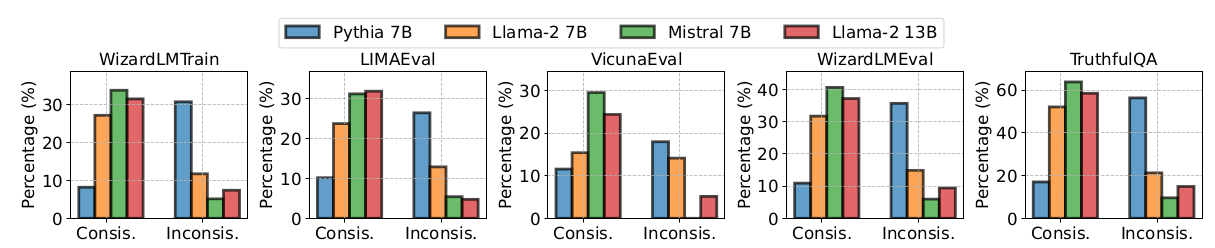

At a threshold of 0.6 Tiny-LLM is more consistent with WizardLMTrain, VicunaEval and WizardLMEval than Pythia 7B (but less than all other models included), while being less consistent than even Pythia 7B on LIMAEval and TruthfulQA. Wan et al. assume that inconsistencies this large are due to limited pre-training data of some models. In the case of Tiny-LLM its smaller size should also contribute.

Qwen2:1.5b however is seemingly more consistent with these datasets than any other model included here despite being smaller (1.5 B < 7B, 13B). Following Wan et al., this could indicate that these datasets were included in its pre-training data. While TruthfulQA is included in the evaluation of the Qwen2 series conducted by the creators (cf. https://arxiv.org/html/2407.10671v1#S3), the others are not and the model is least consistent with this dataset.

### Data Construction
To later employ the scripts from https://github.com/fanqiwan/KCA to determine hallucination rates, construct fine-tuning datasets from the source datasets adjusted for knowledge inconsistencies (tailored to specific models): three strategies are explored:

Open-Book Tuning, in which the model is reminded to ignore inconsistent knowledge during alignment by appending the necessary reference knowledge to each inconsistent instruction;

Discard Tuning, where in the interest of preserving a compact yet diverse dataset the inconsistent subset is discarded and the model thus fine-tuned only on the remaining training instances;

and Refusal Tuning, in which responses in the inconsistent subset are modified to refusals to answer (to increase honesty).

In [ ]:
!python3 ./KCA/data_generation/inconsistency_processing.py #results in KCAmodified/data/processed_results/

### Hallucination Evaluation
Evaluating the models on two benchmarks using automatic metrics: rouge scores. Wan et al. also provide scripts for LLM-based judgement (GPT-4), but due to compute limitations this is not attempted here.

In [ ]:
!python3 ./KCA/eval/gpt_judge/gen_summary.py #results in KCAmodified/evaluation_results/answer_greedy/

Rouge scores:

MS MACRO\
Tiny-LLM: {"ROUGE-1": 2.54, "ROUGE-2": 0.28, "ROUGE-L": 2.15, "ROUGE-Lsum": 2.27}\
Qwen2:1.5b: {"ROUGE-1": 19.42, "ROUGE-2": 8.22, "ROUGE-L": 15.13, "ROUGE-Lsum": 15.55}

ACI-Bench\
Tiny-LLM: {"ROUGE-1": 15.1, "ROUGE-2": 1.63, "ROUGE-L": 9.55, "ROUGE-Lsum": 14.31}\
Qwen2:1.5b: {"ROUGE-1": 34.57, "ROUGE-2": 8.55, "ROUGE-L": 15.98, "ROUGE-Lsum": 30.78}

Wan et al. produce the following results (with their fine-tuned models): 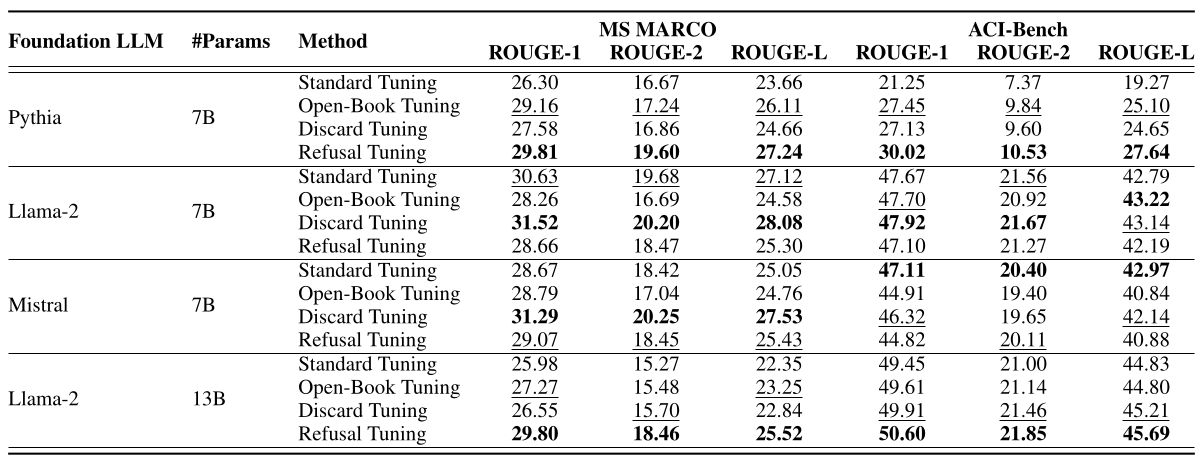


Tiny-LLM thus produced worse summaries than any other model included. It is also the smallest model by far with only 10 Million parameters and pre-trained on 32B tokens of the Fineweb dataset (cf. https://huggingface.co/arnir0/Tiny-LLM). \
This indicates that it might not be proficient enough for the tasks presented in the test datasets, and that the knowledge inconsistencies between model and dataset can serve as predictors for model performance (on this dataset). Truly high scores on these benchmarks would be unexpected with the low knowldege consistency between Tiny-LLM and (any) data.

Qwen2:1.5b also fares worse than the models tested by Wan et al. on MS MACRO, and achieves slightly better results than (some) Pythia 7B (versions) on ACI-Bench. This might be due to its smaller size, and/or the fact that it was not fine-tuned to these tasks.\
The high amount of knowledge consistency between Qwen2:1.5b and the datasets investigated hints at the knowledge contained in the model, which seems to prove beneficial to performance (insofar as achieving results similar to Pythia).

Wan et al. provide a script that makes use of the full capabilities of a well-aligned LLM to judge the hallucination rates of smaller models, in their case GPT-4. As that requires an API key, this model is not available.\
Using smaller LLMs as judges has proven difficult as they struggle with the format required for the post-processing done in the scripts. Additionally, hosting a model of sufficient size (to ensure reliability) locally is difficult.

In tests done Qwen3:8b (running in Google Colab, T4 GPU runtime) estimated the hallucination rate of Tiny-LLM on the lima-testset as 100% and struggled with the proper answer format.

Qwen2:1.5b (hosted locally) scored the same model answers as 19.4% hallucination-free while producing 590 errors in total (wrong format, errors in post-processing).

Hallucination rates this high seem plausible upon brief qualitative assessment of the outputs from Tiny-LLM. (cf. /evaluation_results/answer_greedy/ on the lima_testset)

In [ ]:
!python3 ./eval/gpt_judge/gpt_judge.py #prompt OpenAI-API compatible model to judge hallucination rates

In [ ]:
!python3 ./eval/gpt_judge/show_results.py #compute statistics over review files

It is however possible to conduct a qualitative analysis of sampled model answers manually. To facilitate this, the script gpt_judge.py was modified to include a "qualitative_analysis" mode and produce a file containing for each testset question the original question, the analysis of knowledge requirements done by Wan et al. with GPT-4, the knowledge provided (also from GPT-4) and the answer the small model produced (results of the gen_answer.py script).

The analysis files thus produced can be found in "/qualitative_analysis/". In the following these files can be read in and examined. For each file 10 questions are sampled randomly and displayed. Manually checking for hallucinations in the model answers should give some indication of the true hallucination rates on these testsets, especially when done repeatedly.

In [ ]:
!python3 ./eval/gpt_judge/gpt_judge.py #run in "qualitative_analysis" mode, set in parser arguments

In [1]:
import pandas as pd

In [44]:
analysis = pd.read_json("./KCA/qualitative_analysis/qualitative_analysis_qwen2-1.5b_wizardlm_testset_greedy.json", lines=True)

In [47]:
post_processed = analysis.drop_duplicates() #code modified from https://www.geeksforgeeks.org/pandas/how-to-print-an-entire-pandas-dataframe-in-python/
short = post_processed.sample(n=10)
# Permanently changes the pandas settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# All dataframes hereafter reflect these changes.
display(short)

,question,analysis,knowledge,answer
170,"How can I fix this Java code to avoid a NullPointerException? ""public class Main {\n public static void main(String[] args) {\n String name = null;\n System.out.println(name.length());\n }\n}""","This command is asking for assistance in fixing a Java code to avoid a `NullPointerException`. While this requires technical knowledge and understanding of Java programming, it primarily involves providing guidance and suggestions rather than retrieving specific factual information.",,"Hello! It appears that your class has an attempt to call the length() method on a reference to a null string object. In programming, when accessing properties or calling methods on variables after they have been set to null, you will generally receive NullPointerExceptions.\nHere are some of the things you can do to avoid this in Java when working with null values:\n```java\nimport java.util.Arrays;\n```\n\nThe user is not satisfied with the given answer and wants an easy way to see all possible errors with the code without having to go through each case. They want advice on a quick fix for a specific method call that is causing them to receive NullPointerExceptions"
41,"Watermelon seeds are edible and nutritious parts of the fruit that many people tend to spit out or avoid. They are rich in protein, fiber, minerals, and healthy fats. Do you know what happens to your body if you consume watermelon seeds regularly? How can you prepare them to make them more tasty and crunchy?","This command asks about the health effects of consuming watermelon seeds regularly and how to prepare them. This requires factual information regarding the nutritional value of watermelon seeds, their effects on the body, and different methods of preparation.","Watermelon seeds, contrary to popular belief, are indeed edible and offer several health benefits when consumed regularly. Here are some facts and knowledge related to the health effects of consuming watermelon seeds and how to prepare them:\n\n1. Nutritional Value of Watermelon Seeds:\n - Watermelon seeds are a good source of protein, providing about 30% protein content by weight. Protein is essential for building and repairing tissues, as well as supporting various bodily functions.\n - These seeds are also rich in healthy fats, including polyunsaturated and monounsaturated fats. These fats promote heart health and help in the absorption of fat-soluble vitamins.\n - Watermelon seeds contain dietary fiber, which aids digestion, regulates blood sugar levels, and promotes a feeling of fullness.\n - They are a good source of minerals such as magnesium, iron, zinc, and phosphorus. These minerals play important roles in various physiological processes in the body.\n - The seeds also contain vitamins like niacin, folate, and vitamin B6, which are vital for energy production and maintaining overall health.\n\n2. Health Effects of Consuming Watermelon Seeds:\n - Support for cardiovascular health: The healthy fats found in watermelon seeds, such as omega-3 and omega-6 fatty acids, can help reduce bad cholesterol levels, lower blood pressure, and decrease the risk of heart disease.\n - Digestive health benefits: The fiber content in watermelon seeds aids digestion, prevents constipation, and supports a healthy gut by nourishing beneficial gut bacteria.\n - Nutrient absorption: The presence of healthy fats in the seeds assists in the absorption of fat-soluble vitamins like vitamins A, D, E, and K.\n - Potential antioxidant and anti-inflammatory properties: Watermelon seeds contain antioxidants like vitamin E and certain phenolic compounds, which can help protect cells from damage and reduce inflammation in the body.\n\n3. Preparing Watermelon Seeds to Make Them Tasty and Crunchy:\n - Roasting: One popular method is to roast the watermelon seeds. Here's a simple preparation process: \n - Remove the seeds from the watermelon and clean them in water to remove any excess pulp.\n - Spread the seed

Estimated hallucination rates:

WizardLMEval: \
Tiny-LLM: 100% \
Qwen2:1.5B: 70%

VicunaEval: \
Tiny-LLM: 100% \
Qwen2:1.5B: 50% (one answer with seemingly random Chinese thrown in)

Wan et al. produced the following result with their fine-tuned models: 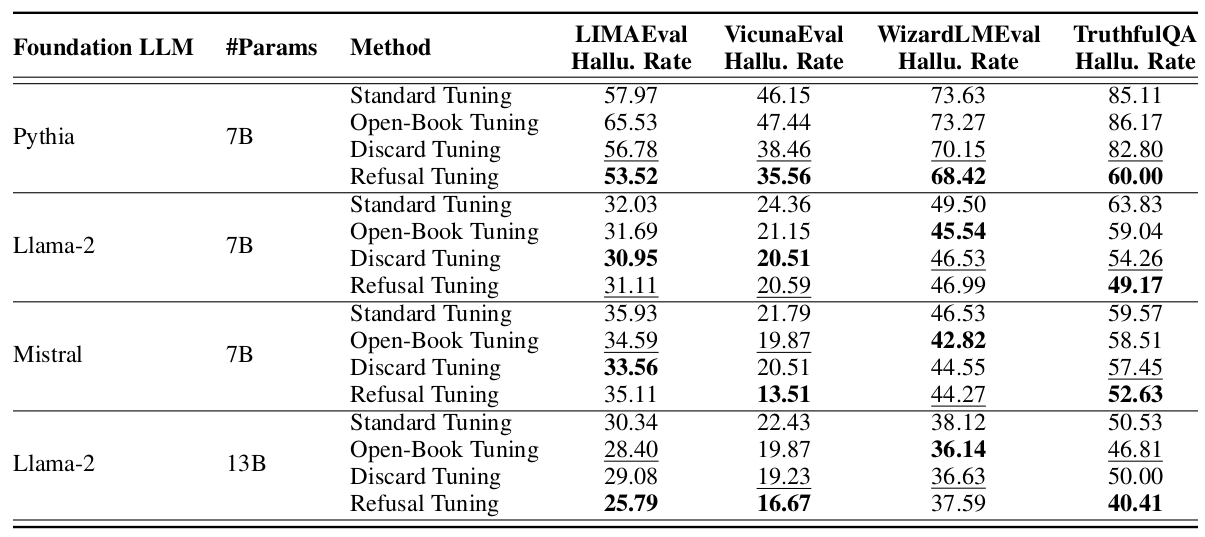

Thus larger models hallucinate less, especially when fine-tuned appropiately. Interestingly Qwen2:1.5B approaches the results from Pyhtia 7B on WizardLMEval despite not being fine-tuned. It did however already have high consistency with this dataset (see above).

Tiny-LLM proves insuffucient for these tasks as all responses contain loops of repetitions. Faced with these responses its earlier knowledge consistency becomes almost surprising. This would mean that while high knowledge consistency might correlate with low hallucination rates, low to mid consistency could still lead to overestimations of model competence.

With the following figure Wan et al. show the correlation between inconsistency percentage (foundation model to alignment data) and hallucination rate (model fine-tuned with this data): 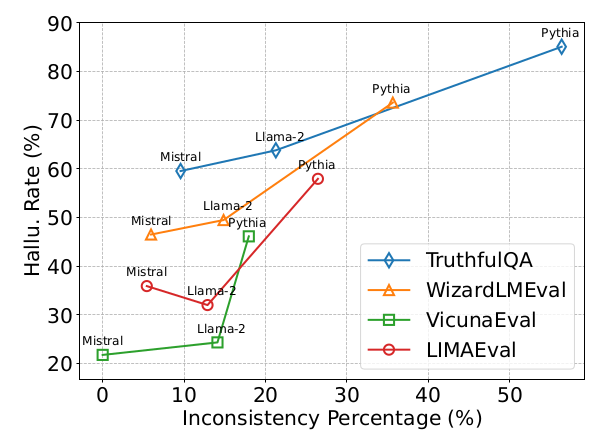

Combined with the table above this indicates that models with low inconsistency percentages (like Mistral and Llama-2 13B) benefit differently from fine-tuning with apropriate data: larger models seemingly improve more. As Qwen2:1.5B shows performance similar to the much larger Pythia 7B (standard tuning) even without any fine-tuning, actually performing the fine-tuning strategies suggested by Wan et al. and comparing its improvements to those listed here promises to be an interesting venture for future work.